IMPORT LIBRARIES

In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats



LOAD DATA

In [146]:
import pandas as pd
 #Load the Excel file
df = pd.read_csv("/content/tipsfunc.csv")
df.head()




,total_bill,tip,sex,smoker,day,time,size,percentage
0,16.99,1.01,Female,No,Sun,Dinner,2,5.94
1,10.34,1.66,Male,No,Sun,Dinner,3,16.05
2,21.01,3.50,Male,No,Sun,Dinner,3,16.66
3,23.68,3.31,Male,No,Sun,Dinner,2,13.98
4,24.59,3.61,Female,No,Sun,Dinner,4,14.68


DATA EXPOLARITION

Total number of Rows

In [163]:
# Display the rows
print("TIPS dataset consists of {rows} rows.".format(rows = len(df)))

TIPS dataset consists of 244 rows.


GENERAL STATISTICS BEFORE REMOVING OUTLIERS

In [148]:

# Select relevant columns
columns_of_interest = ['total_bill','tip', 'percentage','size','day','sex','smoker','time']
df_selected = df[columns_of_interest]

# Compute statistics
statistics = {
    'mean': df_selected.mean(numeric_only=True),
    'median': df_selected.median(numeric_only=True),
    'mode': df_selected.mode(numeric_only=True).iloc[0],
    'stdev': df_selected.std(numeric_only=True),
    'min': df_selected.min(numeric_only=True),
    'max': df_selected.max(numeric_only=True)
}

# Combine into a DataFrame
stats_df = pd.DataFrame(statistics).T
display(stats_df)

,total_bill,tip,percentage,size
mean,19.785943,2.998279,16.079754,2.569672
median,17.795000,2.900000,15.475000,2.000000
mode,13.420000,2.000000,14.480000,2.000000
stdev,8.902412,1.383638,6.107020,0.951100
min,3.070000,1.000000,3.560000,1.000000
max,50.810000,10.000000,71.030000,6.000000


CLEANING DATA AND REMOVING OUTLIERS

In [149]:
# Select relevant columns
df = df[['total_bill', 'tip', 'percentage','size','day','sex','smoker','time']]

# Remove missing values
df_clean = df.dropna()

# Function to remove outliers using IQR
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Remove outliers for numerical columns
for col in ['total_bill', 'tip', 'percentage','size']:
    df_clean = remove_outliers_iqr(df_clean, col)

# Final cleaned dataset
df_clean.reset_index(drop=True, inplace=True)
print("TIPS dataset consists of {rows} cleaned rows.".format(rows = len(df_clean)))


TIPS dataset consists of 216 cleaned rows.


GENERAL STATISTICS AFTER REMOVING OUTLIERS

In [150]:
# Select relevant columns
columns_of_interest = ['total_bill', 'tip', 'percentage','size','day','sex','smoker','time']
df_selected = df_clean[columns_of_interest]

# Compute statistics
statistics = {
    'mean': df_selected.mean(numeric_only=True),
    'median': df_selected.median(numeric_only=True),
    'mode': df_selected.mode(numeric_only=True).iloc[0],
    'stdev': df_selected.std(numeric_only=True),
    'min': df_selected.min(numeric_only=True),
    'max': df_selected.max(numeric_only=True)
}

# Combine into a DataFrame
stats_df = pd.DataFrame(statistics).T
display(stats_df)

,total_bill,tip,percentage,size
mean,18.341759,2.748843,15.586620,2.425926
median,17.030000,2.580000,15.375000,2.000000
mode,13.420000,2.000000,14.480000,2.000000
stdev,6.999301,1.025754,4.179424,0.749619
min,5.750000,1.000000,5.680000,1.000000
max,40.170000,5.650000,26.630000,4.000000


DIFFRENCE IN GENERAL STATISTICS BEFORE AND AFTER REMOVING OUTLIERS

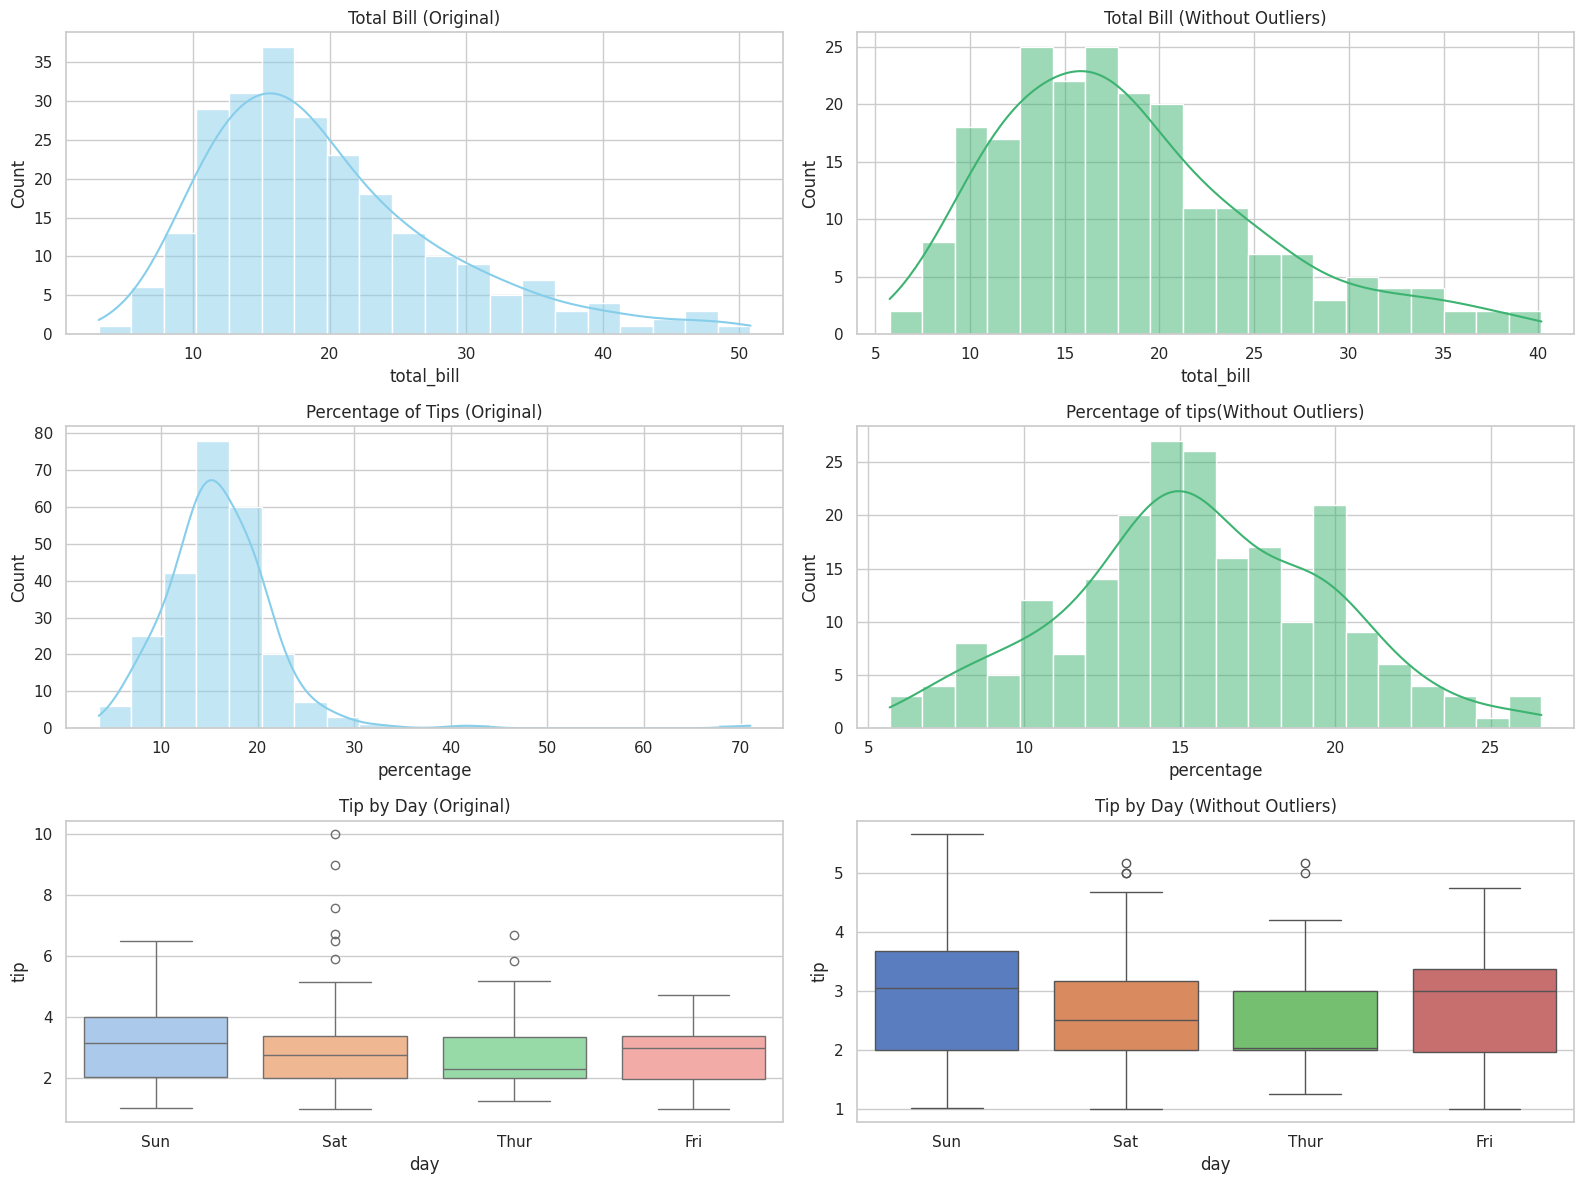

In [151]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(3, 2, figsize=(16, 12))

# Histograms
sns.histplot(df['total_bill'], bins=20, kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Total Bill (Original)')

sns.histplot(df_clean['total_bill'], bins=20, kde=True, ax=axes[0, 1], color='mediumseagreen')
axes[0, 1].set_title('Total Bill (Without Outliers)')

# Histograms
sns.histplot(df['percentage'], bins=20, kde=True, ax=axes[1, 0], color='skyblue')
axes[1, 0].set_title('Percentage of Tips (Original)')

sns.histplot(df_clean['percentage'], bins=20, kde=True, ax=axes[1, 1], color='mediumseagreen')
axes[1, 1].set_title('Percentage of tips(Without Outliers)')

# Boxplots of tip by day
sns.boxplot(data=df, x='day', hue='day', y='tip', ax=axes[2, 0], palette='pastel', legend=False)
axes[2, 0].set_title('Tip by Day (Original)')

sns.boxplot(data=df_clean, x='day',hue='day', y='tip', ax=axes[2, 1], palette='muted' , legend=False)
axes[2, 1].set_title('Tip by Day (Without Outliers)')

plt.tight_layout()
plt.show()

CATEGORICAL COLOUMN EXPLORATION

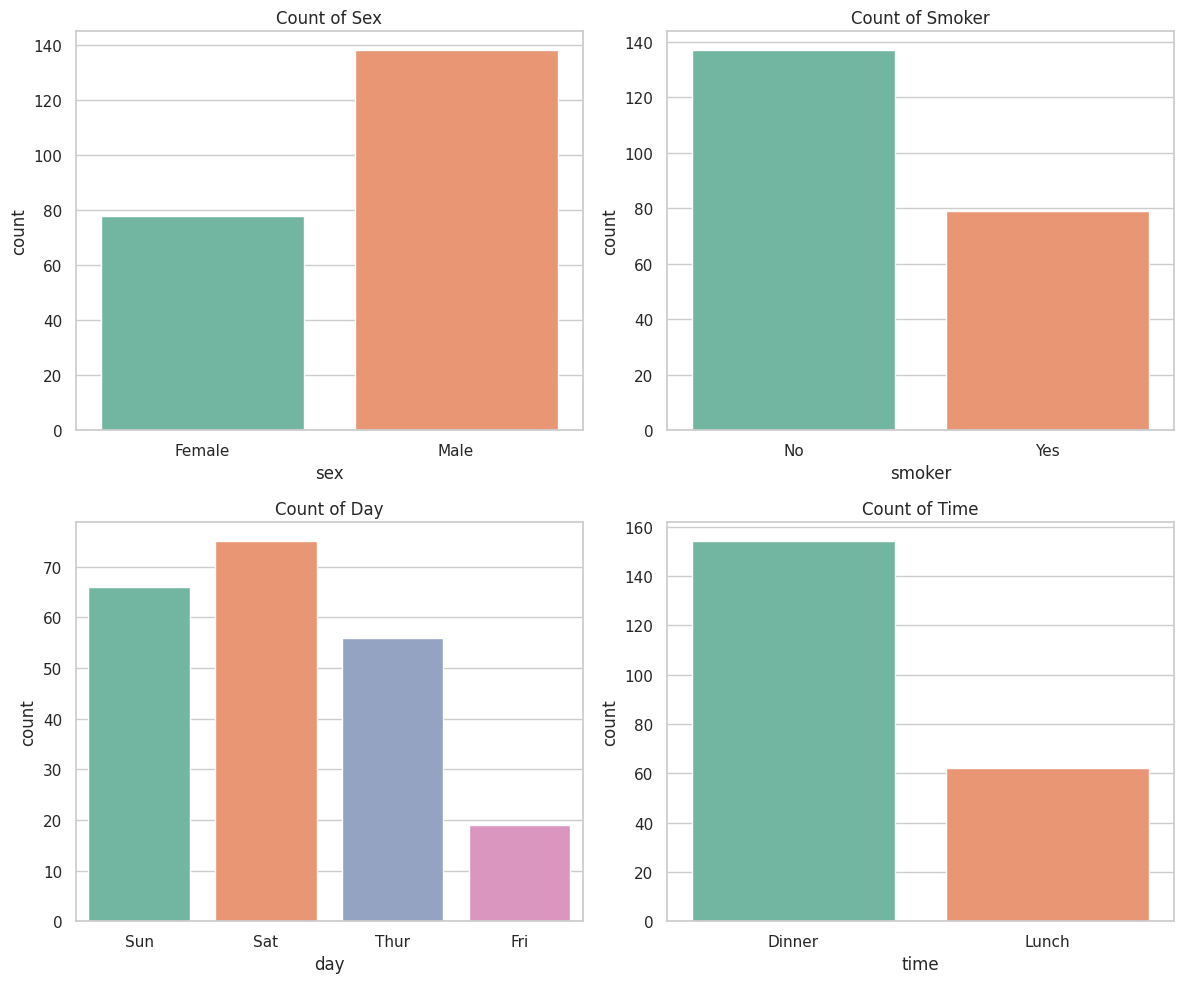

In [152]:
# Set the style
sns.set(style="whitegrid")

# Define categorical columns
categorical_cols = ['sex', 'smoker', 'day', 'time']

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

# Generate count plots with hue and legend disabled
for i, col in enumerate(categorical_cols):
    sns.countplot(data=df_clean, x=col, hue=col, ax=axes[i], palette="Set2", legend=False)
    axes[i].set_title(f'Count of {col.capitalize()}')

plt.tight_layout()
plt.show()

NUMERICAL COLOUMN EXPLORATION

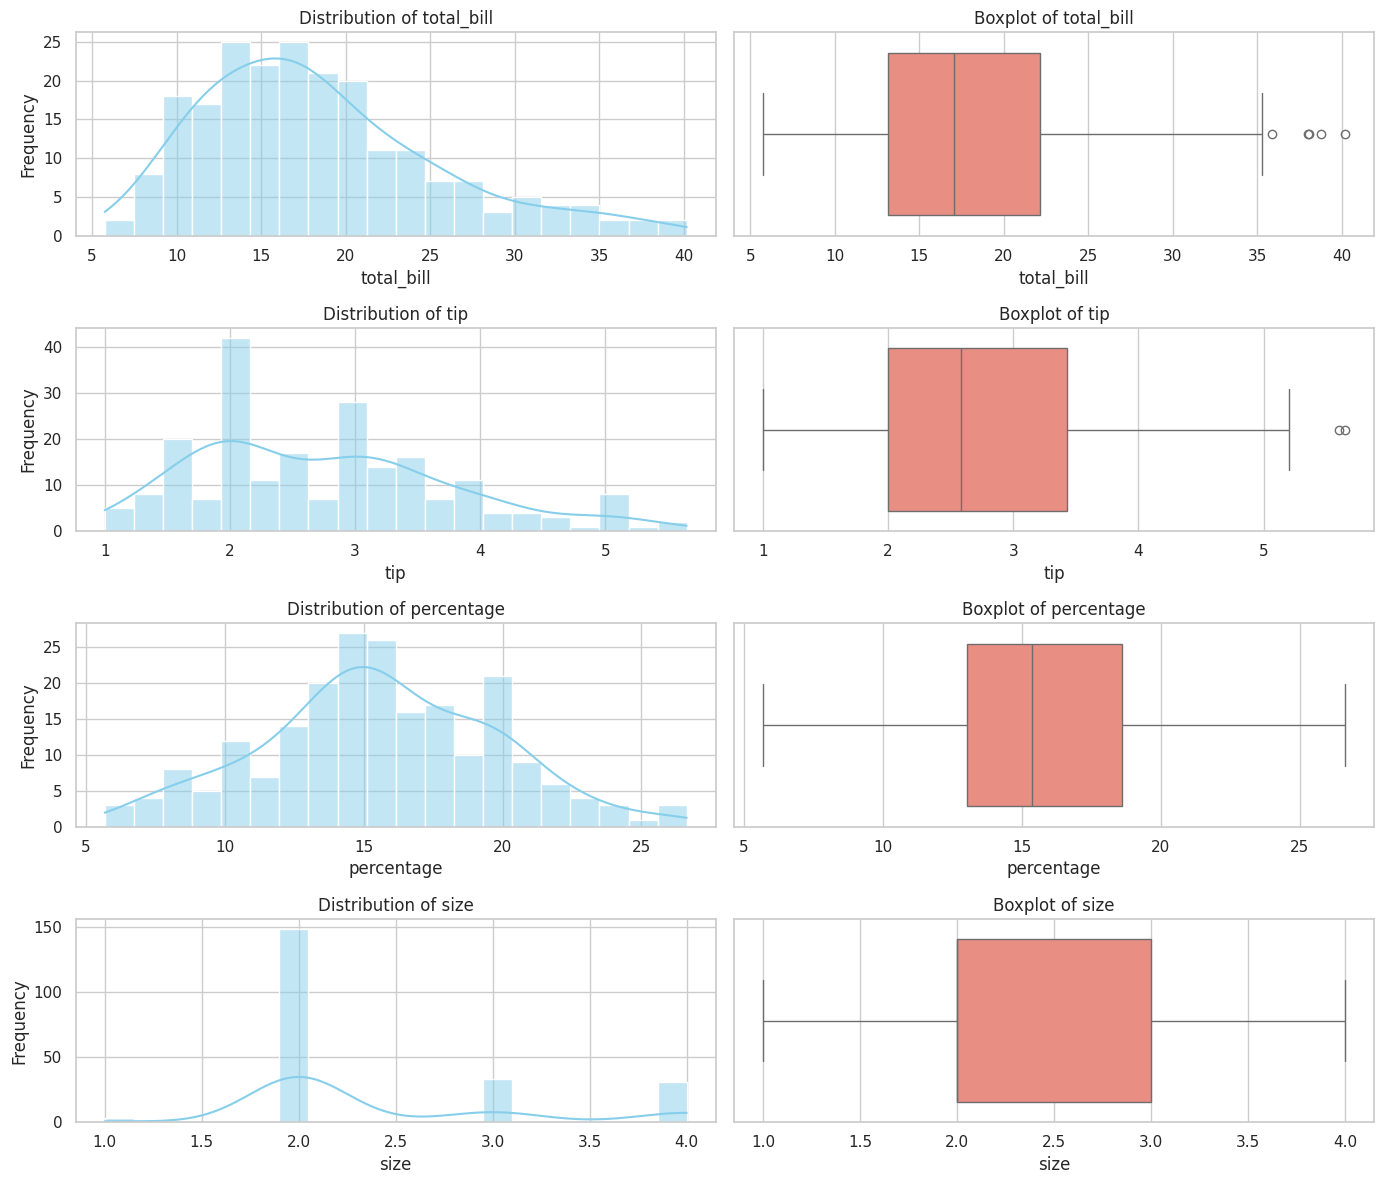

In [164]:
sns.set(style="whitegrid")

# Define numerical columns
numerical_cols = ['total_bill', 'tip', 'percentage','size']

# Create histograms and boxplots for each numerical column
fig, axes = plt.subplots(len(numerical_cols), 2, figsize=(14, 12))

for i, col in enumerate(numerical_cols):
    # Histogram with KDE
    sns.histplot(df_clean[col], bins=20, kde=True, ax=axes[i, 0], color="skyblue")
    axes[i, 0].set_title(f'Distribution of {col}')
    axes[i, 0].set_xlabel(col)
    axes[i, 0].set_ylabel('Frequency')

    # Boxplot
    sns.boxplot(x=df_clean[col], ax=axes[i, 1], color="salmon")
    axes[i, 1].set_title(f'Boxplot of {col}')
    axes[i, 1].set_xlabel(col)

plt.tight_layout()
plt.show()

VARIATION OF TIPS WITH TOTAL BILL


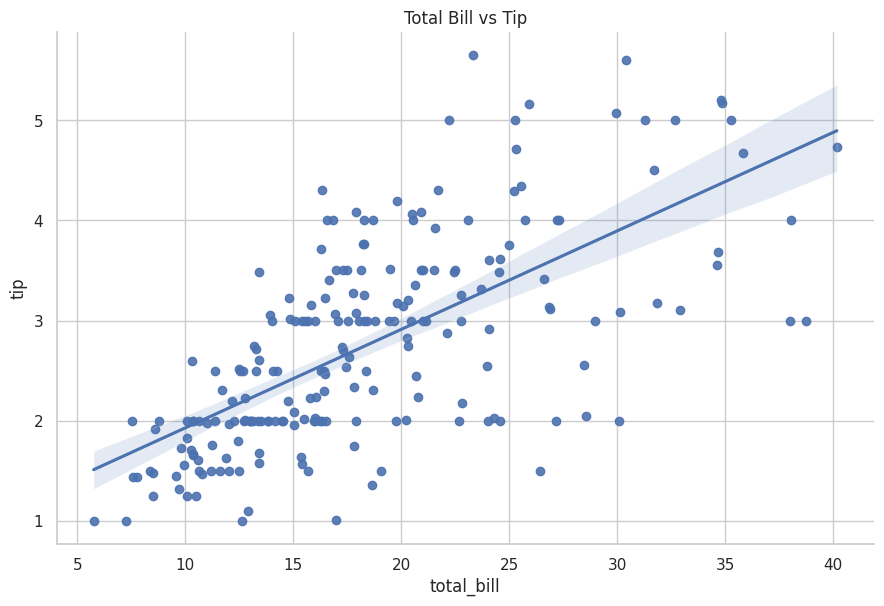

In [165]:
sns.lmplot(data=df_clean, x="total_bill", y="tip", aspect=1.5, height=6, scatter_kws={'alpha':0.9})
plt.title("Total Bill vs Tip")
plt.show()

There’s a positive linear correlation — as the total bill increases, tips generally increase, but not proportionally. Tipping behavior doesn’t always scale perfectly with spending.


VARIATION OF TIPS WITH GENDER

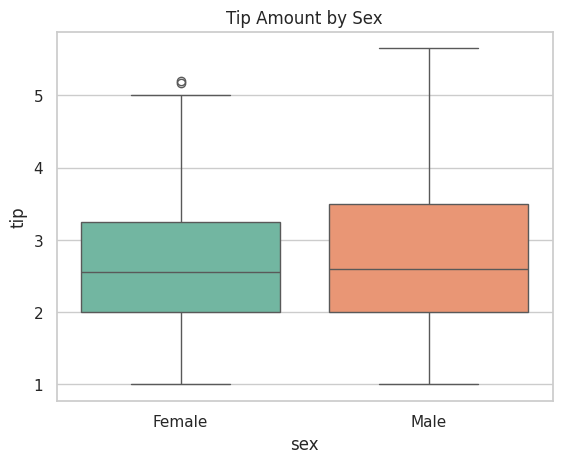

In [156]:
sns.boxplot(data=df_clean,x="sex", hue="sex", y="tip", palette="Set2", legend=False)
plt.title("Tip Amount by Sex")
plt.show()

Median tips for males and females are fairly similar. There's no strong indication that gender significantly affects tipping amount.

VARIATION OF TIPS WITH SMOKING HABIT

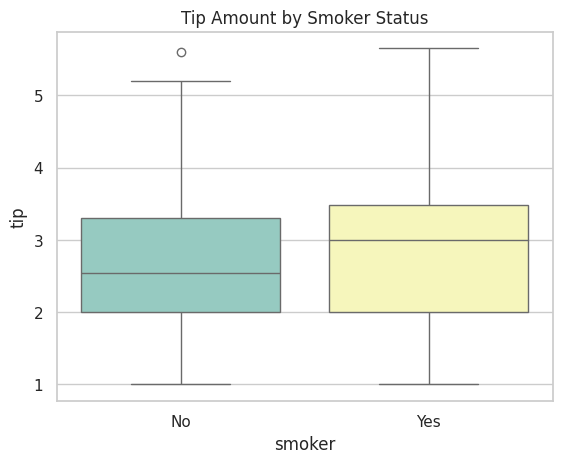

In [157]:
sns.boxplot(data=df_clean, x="smoker",hue="smoker", y="tip", palette="Set3", legend=False)
plt.title("Tip Amount by Smoker Status")
plt.show()

Both smokers and non-smokers have similar tip distributions. However, non-smokers may show slightly more consistent tipping behavior with fewer low-end outliers.

VARIATION OF DAY WITH TIPS

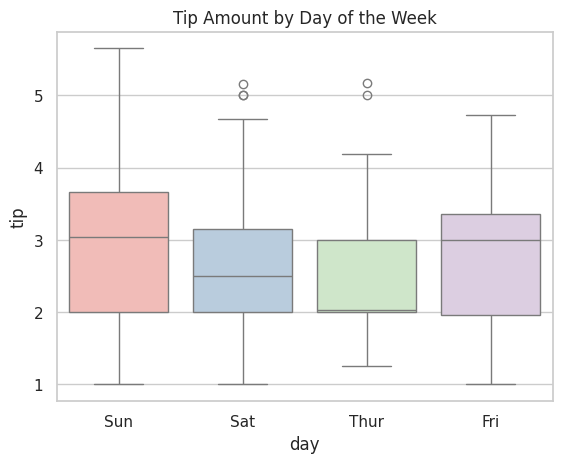

In [166]:
sns.boxplot(data=df_clean, x="day", y="tip",hue="day", palette="Pastel1", legend=False)
plt.title("Tip Amount by Day of the Week")
plt.show()

Tip amounts tend to be slightly higher on Sunday, with more variability. Thursday has a smaller spread and slightly lower median.

VARIATION OF DAY WITH % OF TIP

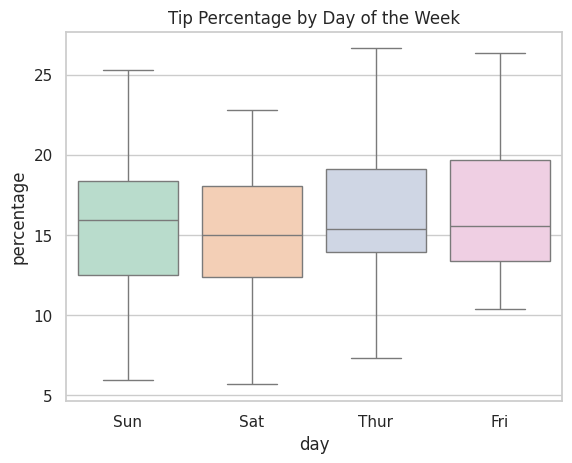

In [159]:
sns.boxplot(data=df_clean, x="day",hue="day",  y="percentage", palette="Pastel2",legend=False)
plt.title("Tip Percentage by Day of the Week")
plt.show()

Tipping percentage is relatively consistent across days, but Thursday and Saturday show slightly higher medians. Friday has a tighter distribution.

VARIATION OF TIP WITH SIZE

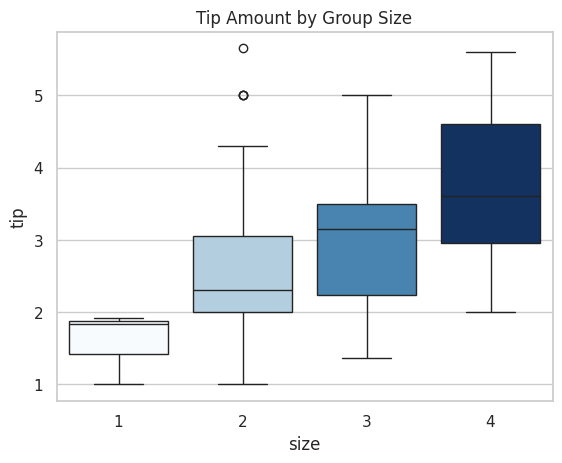

In [160]:
sns.boxplot(data=df_clean, x="size", hue="size", y="tip", palette="Blues", legend=False)
plt.title("Tip Amount by Group Size")
plt.show()

Tips increase with group size up to a point (3–4 people), but larger groups don't necessarily tip more per person. There's also more variability in small groups.

VARIATION OF TIPS WITH TIME OF DINING

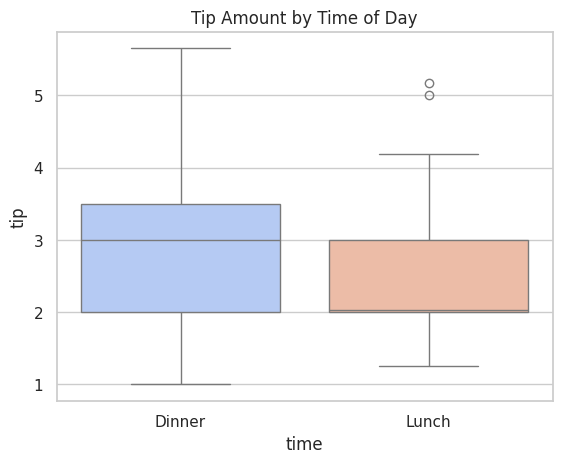

In [161]:
sns.boxplot(data=df_clean, x="time",hue="time", y="tip", palette="coolwarm", legend= False)
plt.title("Tip Amount by Time of Day")
plt.show()

Dinner tips tend to be higher than lunch tips, both in median and range — likely due to higher bills during dinner service.

VARIATION OF GROUP SIZE WITH TIP %

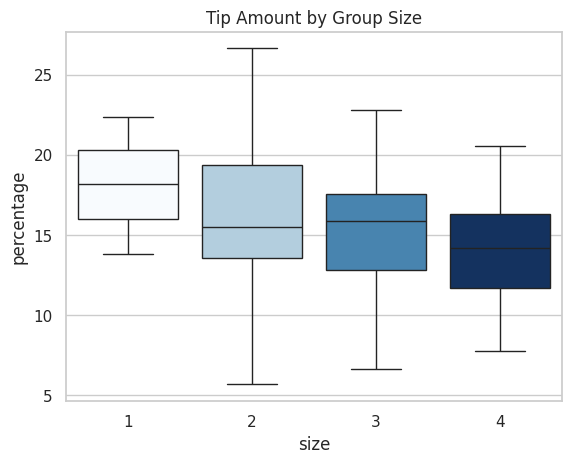

In [162]:
sns.boxplot(data=df_clean, x="size", hue="size", y="percentage", palette="Blues", legend=False)
plt.title("Tip Amount by Group Size")
plt.show()